In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
ds=pd.read_csv("Used_car_price.csv")

In [3]:
ds.head(10)

,Unnamed: 0,Fuel,Driven_kilometers,Num_of_owners,Transmission,Location,Name,Year,Company,Price1
0,0,PETROL,22000.0 KM,1st,MANUAL,"Baner Road, Pune",Maruti Suzuki,2008),Maruti,"1,50,000"
1,2,PETROL,"68,000 KM",1st,MANUAL,"Borivali West, Mumbai",Honda City,2009),Honda,"3,49,000"
2,3,PETROL,50000 KM,Second,MANUAL,"Sahakar Colony, Pune",Maruti Suzuki,2010),Maruti,"1,50,000"
3,4,PETROL,10000 KM,First,MANUAL,"Ravet, Pune",Maruti Suzuki,2016),Maruti,"3,25,000"
4,5,DIESEL,51000.0 KM,1st,MANUAL,"Vithalwadi, Thane",Mahindra Xuv500,2013),Mahindra,"6,90,000"
5,6,DIESEL,51000.0 KM,1st,MANUAL,"Panvel, Navi Mumbai",Mahindra Scorpio,2019),Mahindra,"16,80,000"
6,7,PETROL,43000.0 KM,1st,MANUAL,"Bandra West, Mumbai",Honda City,2014),Honda,"4,65,000"
7,8,PETROL,38000.0 KM,1st,MANUAL,"Thane West, Thane",Honda Wr-V,2018),Honda,"7,95,000"
8,9,NaN,31000.0 KM,1st,NaN,"Nandanvan, Nagpur",Hyundai I10,2012),Hyundai,"2,50,000"
9,10,PETROL,58000.0 KM,1st,NaN,"Nandanvan, Nagpur",Hyundai I10,2010),Hyundai,"2,30,000"


In [4]:
#checking shape of the data set
ds.shape

(5826, 10)

This dataset have 10 columns and 5826 rows

In [5]:
#COLUMNS NAME
ds.columns

Index(['Unnamed: 0', 'Fuel', 'Driven_kilometers', 'Num_of_owners',
       'Transmission', 'Location', 'Name', 'Year', 'Company', 'Price1'],
      dtype='object')

In [6]:
#DTYPES OF COLUMNS
ds.dtypes

Unnamed: 0            int64
Fuel                 object
Driven_kilometers    object
Num_of_owners        object
Transmission         object
Location             object
Name                 object
Year                 object
Company              object
Price1               object
dtype: object

Driven_kilometers, Num_of_owners, Location, Fuel, Transmission, Name, Year, Company, Price1 are object type features

In [7]:
#CHECKING NULL VALUES
ds.isnull().sum()

Unnamed: 0             0
Fuel                  65
Driven_kilometers      4
Num_of_owners        139
Transmission         128
Location               4
Name                   0
Year                   0
Company                0
Price1                 4
dtype: int64

Data set have missing values. Target variable also has missing values, so there is need to drop that rows which have missing values in price

In [8]:
#creating dataframe 
df=pd.DataFrame(ds)

In [9]:
#select only those rows which don't have missing values in variables and dropping unnecessary column
df=df[df['Price1'].notna()]
df=df[df['Num_of_owners'].notna()]
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
#SHAPE OF DATAFRAME
df.shape

(5687, 9)

In [11]:
#filling missing values
df['Fuel']=df['Fuel'].fillna(df['Fuel'].mode()[0])
df['Transmission']=df['Transmission'].fillna(df['Transmission'].mode()[0])
df['Location']=df['Location'].fillna(df['Transmission'].mode()[0])

The features Fuel ,Transmission ,Location and Num_of_owners having null values so I have used mode value to replace null value The features having null values are string type so I have replaced with mode value.

In [12]:
df.isnull().sum()

Fuel                 0
Driven_kilometers    0
Num_of_owners        0
Transmission         0
Location             0
Name                 0
Year                 0
Company              0
Price1               0
dtype: int64

no null values

In [13]:
#Comany column
df['Company'].value_counts()

Maruti           1780
Hyundai           994
Mahindra          569
Honda             371
Tata              354
Toyota            318
Ford              204
Renault           156
Volkswagen        151
Chevrolet         120
Skoda             106
Mercedes-Benz      94
Bmw                93
Audi               66
Nissan             52
Other              37
Fiat               31
Jaguar             22
Land               19
Jeep               18
Kia                17
Bajaj              13
Mitsubishi         12
Mg                 10
Datsun             10
Mercedes            9
Porsche             9
Ashok               8
Volvo               8
Mini                7
Force               7
Ambassador          6
Isuzu               4
Ssangyong           2
Hindustan           2
Eicher              1
Dc                  1
Opel                1
Maserati            1
Mazda               1
Citroen             1
Conquest            1
Bentley             1
Name: Company, dtype: int64

above counting shows that company column have different values

In [14]:
#COUNT VALUE BY NAME OF CARS
df['Name'].value_counts()

Maruti Suzuki       1780
Hyundai I10          180
Honda City           162
Toyota Innova        159
Mahindra Bolero      157
                    ... 
Mahindra Logan         1
Chevrolet Others       1
Tata Winger            1
Volvo V40              1
Toyota Camry           1
Name: Name, Length: 232, dtype: int64

DIESEL                            2955
PETROL                            2405
CNG & HYBRIDS                      164
CNG                                 77
LPG                                 70
ELECTRIC                             9
PETROL/COMPRESSED NATURAL GAS        4
PETROL/LIQUIFIED PETROLEUM GAS       3
Name: Fuel, dtype: int64


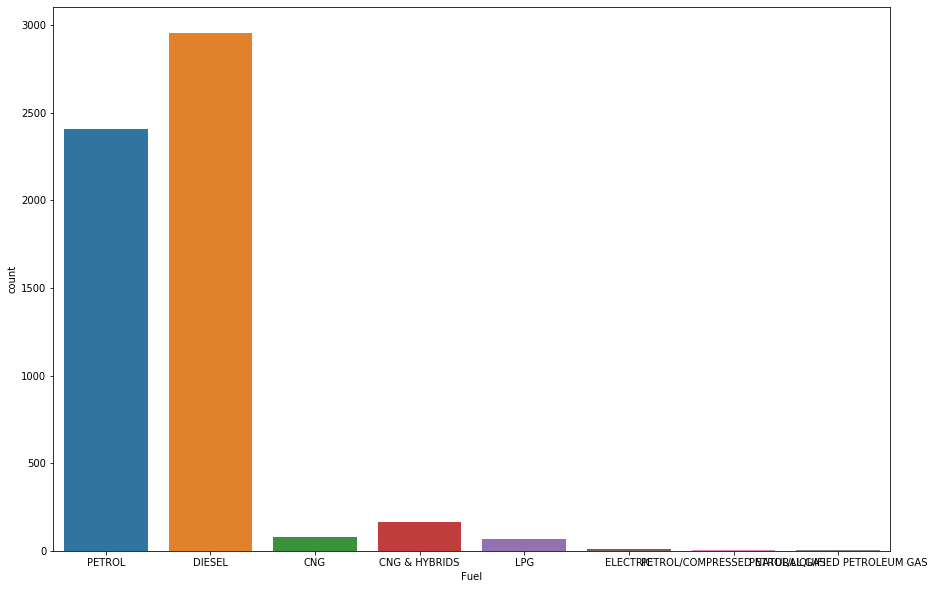

In [15]:
#PLOT TO CHECK THE TYPE OF FUELS
print(df['Fuel'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['Fuel'])

Above countplot of fuel shows different values of fuel and their counting.


Diesel fueled cars have the highest count 

1st       3219
2nd       1434
3rd        351
First      259
Second     200
Third       77
4th         74
4+          41
Fourth      32
Name: Num_of_owners, dtype: int64


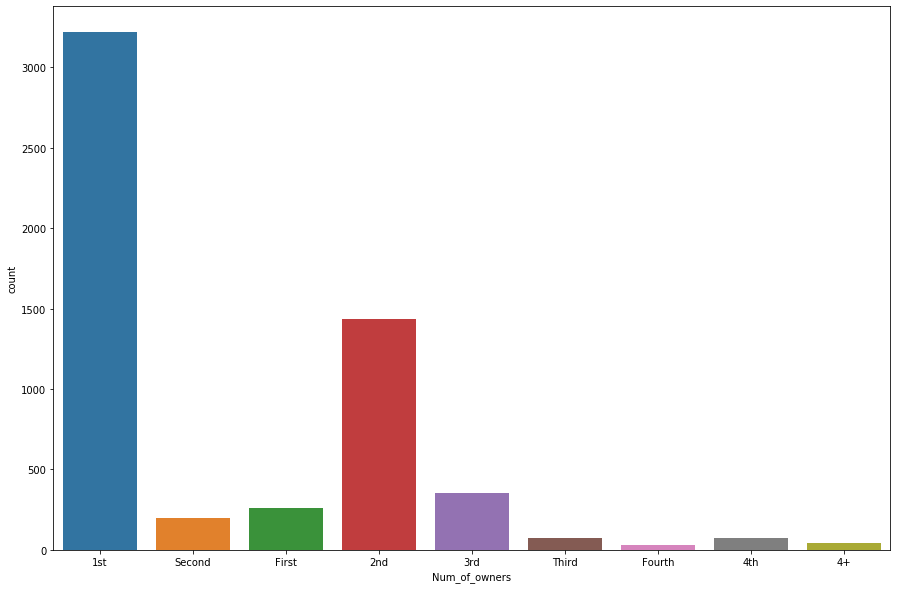

In [16]:
#PLOT TO SHOW THE NUMBER OF OWNERS
print(df['Num_of_owners'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['Num_of_owners'])

Above countplot shows different values of num_of_owners column

MANUAL       4623
AUTOMATIC    1064
Name: Transmission, dtype: int64


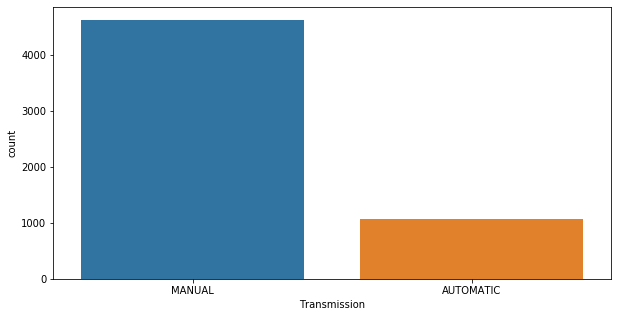

In [17]:
#PLOT TO SHOW THE TYPE OF TRANSMISSION
print(df['Transmission'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df['Transmission'])

Above countplot shows that how many cars have manual transmission or automatic transmission and some cars have no info

In [18]:
#year column gives info about when car is purchased
df['Year'].value_counts()

2014)      550
2012)      518
2016)      505
2015)      503
2013)      493
2017)      446
2018)      431
2011)      418
2010)      319
2019)      317
2009)      231
2008)      207
2020)      171
2007)      156
2021)       96
2006)       82
2005)       56
2004)       52
2003)       37
2002)       23
2000)       16
2001)       12
1999)       11
1997)        6
1998)        6
1995)        4
1984)        2
1978)        2
1989)        2
1900)        1
2009.0)      1
1985)        1
2013.0)      1
1957)        1
2007.0)      1
1986)        1
1996)        1
2015.0)      1
1990)        1
1987)        1
1988)        1
1992)        1
1980)        1
1976)        1
Name: Year, dtype: int64

The above count shows the no of cars sold in perticuler year

1. In 2014 the no of cars sold the highest while years from late 2000s shows the lowest sale

In [19]:
df['Price1'].value_counts()

 2,50,000    97
 3,25,000    88
 4,50,000    78
 3,50,000    78
 6,50,000    76
             ..
 3,45,500     1
 2,42,000     1
 79,500       1
 5,52,000     1
 89,500       1
Name: Price1, Length: 800, dtype: int64

Cars with range from 2 lacs to 6 lacs have highest count

In [20]:
#REMOVING EXCESS INFO AND CONVERTING PRICE INTO FLOAT VALUES
df['Price1']=df['Price1'].str.replace(",",'')
df['Price1']=df['Price1'].apply(lambda x: float(x))
df['Price1']

0       150000.0
1       349000.0
2       150000.0
3       325000.0
4       690000.0
          ...   
5821    600000.0
5822    190000.0
5823     70000.0
5824    145000.0
5825    115000.0
Name: Price1, Length: 5687, dtype: float64

as the price values should be numeric type but in data set it is of object type, so we need to convert it into float form. First replace comma(,) by bank space and then convert it into format(float)

In [21]:
#SPLITTING EXCESS INFO AND CONVERTION TO FLOAT DTYPE
df['Driven_kilometers']=df['Driven_kilometers'].str.split(" ").str.get(0).str.replace(",",'')
df['Driven_kilometers']=df['Driven_kilometers'].str.split(".").str.get(0)
df['Driven_kilometers']=df['Driven_kilometers'].fillna(0)
df['Driven_kilometers']=df['Driven_kilometers'].astype(int)
df['Driven_kilometers']

0        22000
1        68000
2        50000
3        10000
4        51000
         ...  
5821    107500
5822        15
5823     61000
5824     60000
5825     65000
Name: Driven_kilometers, Length: 5687, dtype: int32

In [22]:
df['Driven_kilometers']=df['Driven_kilometers'].apply(lambda x: float(x))
df['Driven_kilometers']

0        22000.0
1        68000.0
2        50000.0
3        10000.0
4        51000.0
          ...   
5821    107500.0
5822        15.0
5823     61000.0
5824     60000.0
5825     65000.0
Name: Driven_kilometers, Length: 5687, dtype: float64

Driven_kilometer column gives info about how many kilometers car has been driven, so it should be in float format, First split values and replace special characters and commas and then convert it into float type

In [23]:
#SPLITTING EXCESS VALUE AND CONVERTING TO INT DTYPES
df['Year']=df['Year'].str.replace(")",'')
df['Year']=df['Year'].str.replace(".",'')
df['Year']=df['Year'].astype(int)

In year column, some signs are present so replaced that with blank space and convert it into numeric data.

In [24]:
df['Num_of_owners']=df['Num_of_owners'].replace('1st',1)
df['Num_of_owners']=df['Num_of_owners'].replace('1st Owner',1)
df['Num_of_owners']=df['Num_of_owners'].replace('First',1)
df['Num_of_owners']=df['Num_of_owners'].replace('2nd',2)
df['Num_of_owners']=df['Num_of_owners'].replace('2nd Owner',2)
df['Num_of_owners']=df['Num_of_owners'].replace('Second',2)
df['Num_of_owners']=df['Num_of_owners'].replace('3rd',3)
df['Num_of_owners']=df['Num_of_owners'].replace('3rd Owner',3)
df['Num_of_owners']=df['Num_of_owners'].replace('Third',3)
df['Num_of_owners']=df['Num_of_owners'].replace('4th',4)
df['Num_of_owners']=df['Num_of_owners'].replace('4+',5)
df['Num_of_owners']=df['Num_of_owners'].replace('4th Owner',4)
df['Num_of_owners']=df['Num_of_owners'].replace('Fourth',4)

NUm_of_owners tells how many peoples used car so convert this column into numeric type. map values 1st,1st Owner,First to 1 map values 2nd,2nd Owner,Second, to 2 map values 3rd,3rd Owner,Third to 3 map values 4th,'4th Owner,Fourth to 4 map values 4+ to 5

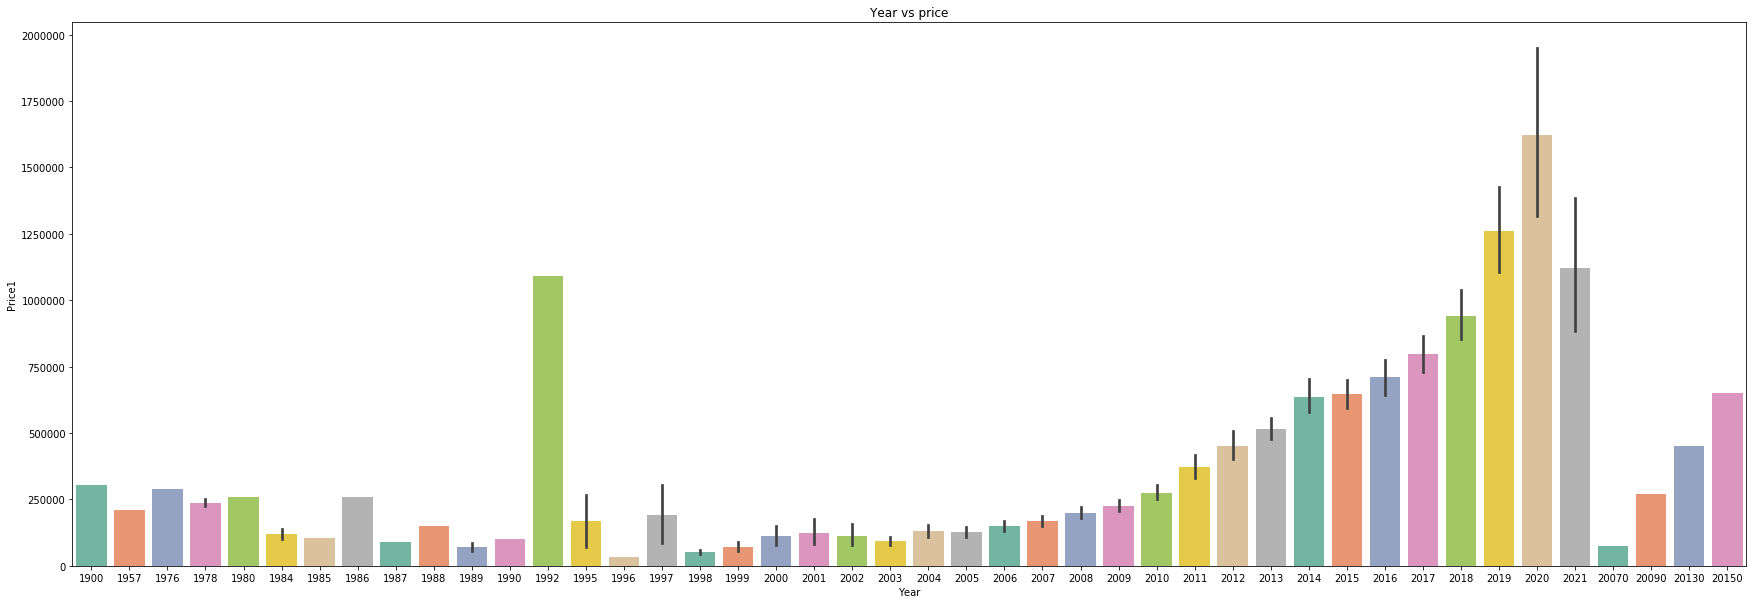

In [25]:
#PLOT TO COMPARE YEAR WITH PRICE OF CARS
plt.figure(figsize=(30,10))
plt.title('Year vs price')
sns.barplot(x=df["Year"],y=df["Price1"],palette="Set2")

Recently bought car has high price compare to others

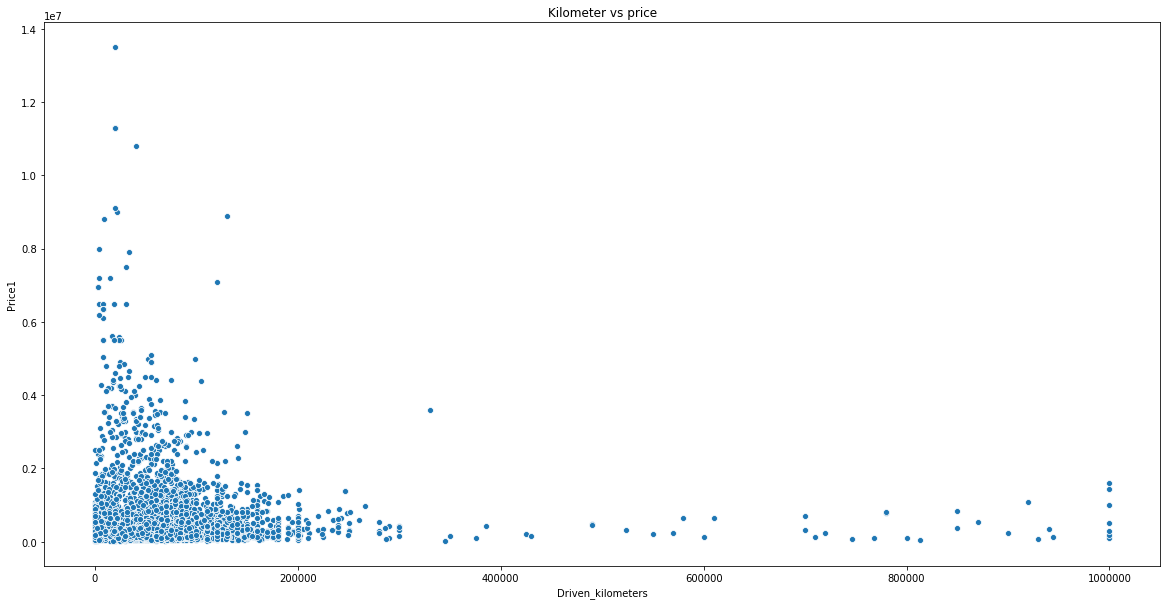

In [26]:
#PLOT TO COMPARE KILOMETERS CAR DRIVEN TO PRICE OF CAR
plt.figure(figsize=(20,10))
plt.title('Kilometer vs price')
sns.scatterplot(x=df["Driven_kilometers"],y=df["Price1"],palette="Set2")

The cars which has less kilometers driven has high value in the market

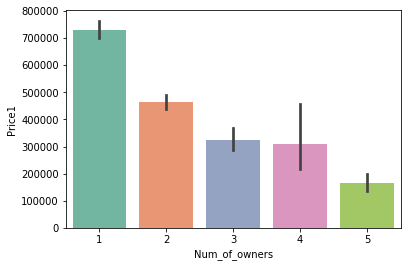

In [27]:
#PLOT TO CHECK NO. OF OWNERS TO PRICE OF CAR
sns.barplot(x=df["Num_of_owners"],y=df["Price1"],palette="Set2")

if the car is from first owner it has high value

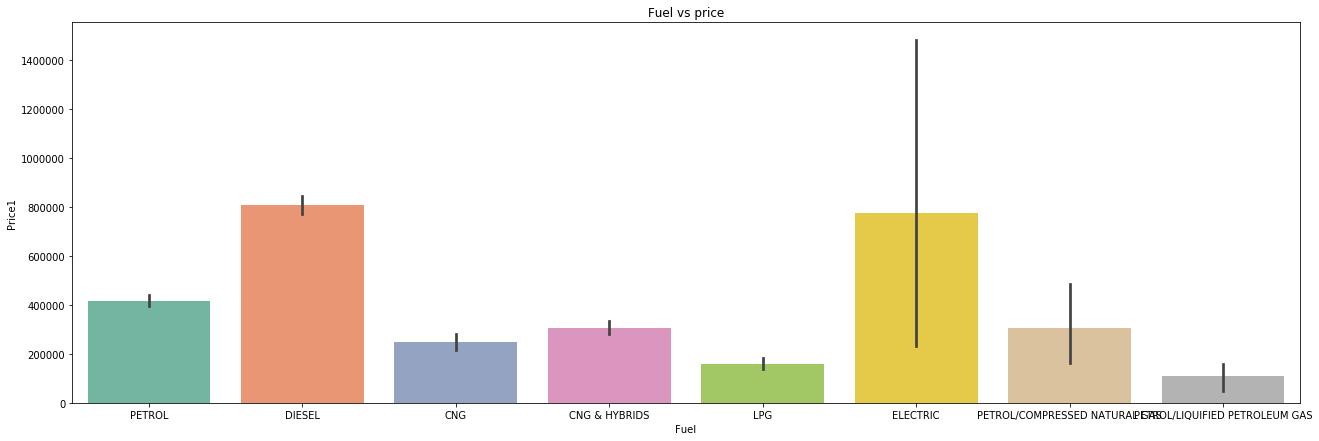

In [28]:
#PLOT TO COMPARE TYPE OF FUEL TO PRICE OF CAR
plt.figure(figsize=(22,7))
plt.title('Fuel vs price')
sns.barplot(x=df["Fuel"],y=df["Price1"],palette="Set2")

Diesel cars and electric cars are high pricey than other fuel emissioned cars

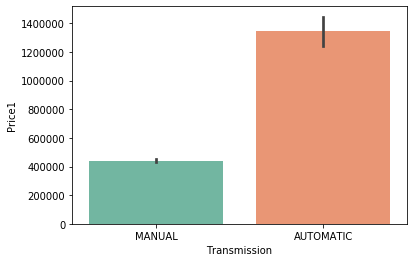

In [29]:
#PLOT TO COMPARE TRANSMISSION WITH PRICE OF CAR
sns.barplot(x=df["Transmission"],y=df["Price1"],palette="Set2")

Automatic cars are pricey when compare  to manual

In [30]:
#USING ZSCORE TO REMOVE OUTLIERS
from scipy.stats import zscore
z = np.abs(zscore(df["Price1"]))
print(np.where(z > 3))

(array([  24,   25,  296,  297,  321,  408,  411,  437,  449,  467,  469,
        496,  553,  644,  706,  764,  784,  808,  966,  994, 1003, 1055,
       1056, 1095, 1178, 1262, 1293, 1310, 1313, 1355, 1360, 1437, 1643,
       1845, 1901, 1968, 2017, 2032, 2051, 2054, 2055, 2078, 2110, 2148,
       2174, 2192, 2193, 2226, 2240, 2300, 2302, 2309, 2318, 2347, 2358,
       2374, 2376, 2453, 2473, 2511, 2524, 2532, 2535, 2553, 2653, 2687,
       2692, 2693, 2740, 2744, 2804, 2814, 2822, 2849, 3015, 3057, 3072,
       3073, 3086, 3152, 3254, 3258, 3271, 3272, 3275, 3374, 3515, 3561,
       3593, 3733, 3789, 3806, 4103, 4104, 4105, 4165, 4206, 4246, 4247,
       4336, 4338, 4379, 4454, 4455, 4457, 4518, 4524, 4575, 4581, 4594,
       4604, 4609, 4621, 4641, 4642, 4660, 4663, 4723, 4728, 4768, 4843,
       4851], dtype=int64),)


In [31]:
df_clean = df[(z<3)]

In [32]:
df.shape

(5687, 9)

In [33]:
df_clean.shape

(5565, 9)

In [34]:
#DIFFERENCE IN THE DATA LOSS AFTER REMOVING OUTLIERS
((5687-5565)/5687)*100

2.145243537893441

2.14% dataloss

In [35]:
#LABAL ENCODING TO CONVERT CATAGORICAL VALRIABLE TO NUMERIC VARIABLES
dff=df_clean
col_encod=['Name','Location','Driven_kilometers','Num_of_owners','Transmission','Year','Company','Fuel']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    dff[col]= label.fit_transform(df_clean[col])
dff.head()

,Fuel,Driven_kilometers,Num_of_owners,Transmission,Location,Name,Year,Company,Price1
0,5,227,0,1,283,119,26,23,150000.0
1,5,787,0,1,455,57,27,15,349000.0
2,5,532,1,1,2194,119,28,23,150000.0
3,5,125,0,1,2138,119,34,23,325000.0
4,2,550,0,1,2744,117,31,22,690000.0


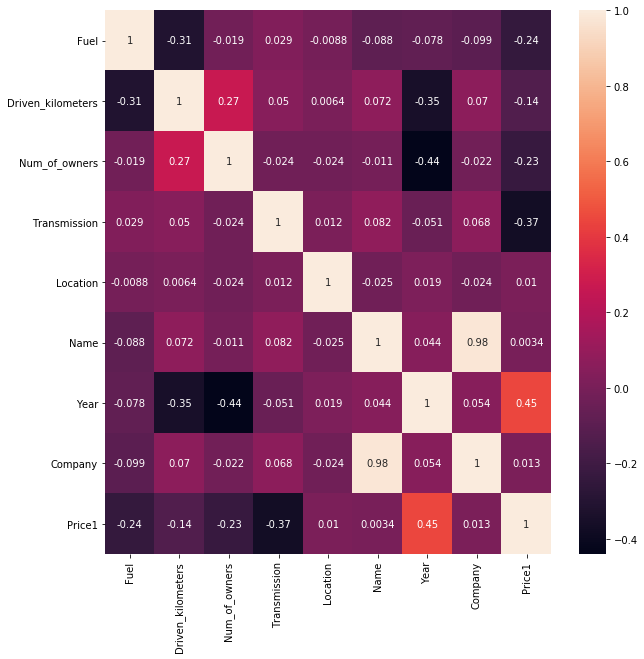

In [36]:
#CHECKING CORRELATION
correlation=dff.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

1. Transmission is negatively corelated to price
2. Year is negatively corelated to num of owner
3. year is positively corelated to price

In [37]:
#sepearate target variable
x=dff.drop(["Price1"],axis=1)
y1=dff['Price1']

In [38]:
#SCALING DATA 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x=scaled
y=y1

In [40]:
#TRAIN TEST MODEL
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [41]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 221205.86882183907
Mean squared error 134232102037.36525
Root Mean squared error 366376.99441608676
R2 Score 0.33956307949173437
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 286723.7265358489
Mean squared error 220016985910.08374
Root Mean squared error 469059.68267384026
R2 Score -0.08250812159313403
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 164276.3405172414
Mean squared error 88777009059.83621
Root Mean squared error 297954.709746022
R2 Score 0.5632072091138695
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 236960.49540565678
Mean squared error 134662666689.85312
Root Mean squared error 366964.12180191826
R2 Score 0.3374446533563109
---------------------

In [42]:
#CROSS VALIDATING THE RESULT 
scorel=[]

In [43]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.41227123, 0.41468206, 0.36480239, 0.33502378, 0.23716817])

In [44]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-0.10355259, -0.13377682, -0.08639701, -0.07333948, -0.02156721])

In [45]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.58289687, 0.60549731, 0.65742098, 0.42505468, 0.54782489])

In [46]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.39871933, 0.36718507, 0.38467294, 0.3195151 , 0.22247467])

In [47]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.39872315, 0.36718501, 0.3846841 , 0.3195251 , 0.22249448])

In [48]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.69991872, 0.74793929, 0.75966077, 0.71060426, 0.7061338 ])

In [49]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.68919947, 0.71751836, 0.69096048, 0.70932083, 0.64509486])

In [50]:
#DIFFERENCE IN ACTUAL VALUE AND PREDICTED VALUE
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [ 0.07270815  0.07511898  0.02523932 -0.00453929 -0.10239491]
SVR() difference is [-0.02104447 -0.0512687  -0.00388889  0.00916864  0.06094091]
DecisionTreeRegressor() difference is [ 0.01968966  0.0422901   0.09421377 -0.13815253 -0.01538232]
LinearRegression() difference is [ 0.06127467  0.02974041  0.04722828 -0.01792955 -0.11496998]
Lasso() difference is [ 0.06127756  0.02973942  0.04723851 -0.01792049 -0.11495111]
RandomForestRegressor() difference is [-0.00769681  0.04032376  0.05204523  0.00298873 -0.00148174]
GradientBoostingRegressor() difference is [ 0.00495919  0.03327808  0.00672019  0.02508055 -0.03914542]


In [51]:
#KNeighborsRegressor
(0.07270815+0.07511898+0.02523932+0.00453929+0.10239491)/5

0.05600013

In [52]:
#SVR()
(0.02104359+0.05125741+0.00390197+0.00921552+0.06097077)/5

0.029277852000000004

In [53]:
#DecisionTreeRegressor
(0.04083771+0.03867193+0.12041043+0.13396151+0.00578827)/5

0.06793397

In [54]:
#LinearRegression
(0.06127467+0.02974041+0.04722828+0.01792955+0.11496998)/5

0.05422857799999999

In [55]:
#Lasso
(0.06127756+0.02973942+0.04723851+0.01792049+0.11495111)/5

0.054225418000000004

In [56]:
#RandomForestRegressor
(0.0018608+0.04154356+0.04967076+0.00725663+0.00075844)/5

0.019473717999999998

In [57]:
#GradientBoostingRegressor
(0.00571788+0.0347384+0.00862511+0.02709022+0.03792933)/5

0.022820187999999998

RandomForestRegressor has least difference

In [58]:
#HYPERPARAMETER TO GET BEST PARAMETER
from sklearn.model_selection import GridSearchCV
parameters = { "learning_rate": [0.01, 0.025, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.6, 0.8, 1.0],
    "n_estimators":[10,100,1000]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid = parameters, cv = 5, scoring = "r2")


In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt','log2'],'n_estimators': [10, 100, 200, 500],'bootstrap':[True],'max_depth': [1, 23, 45],'min_samples_split': [5, 10]}
grid = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'bootstrap': True, 'max_depth': 45, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 500}


In [61]:
x=scaled
y=y1

In [62]:
#TUNING THE MODEL WITH BEST PARAMETERS
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=RandomForestRegressor(n_estimators=500,max_features='auto',bootstrap=True,max_depth=23,min_samples_split=5)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 72.0
Mean absolute error 140663.60207107532
Mean squared error 64585326210.1786
Root Mean squared error 254136.43227640266
r2 score 72.0


After hyper tuning accuracy is increased to 72%